In [204]:
def recommend_with_svd(A,energy_percentage=0.9):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # SVD
    m = A.shape[0]
    n = A.shape[1]
    U,s,VT = np.linalg.svd(A, full_matrices=False)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(A, cmap='hot', interpolation='nearest')
    plt.title('Original Matrix')
    plt.colorbar()
    plt.xlabel('Items')
    plt.ylabel('Users')
    plt.xticks(np.arange(n), [f"Item {i+1}" for i in range(n)])
    plt.yticks(np.arange(m), [f"User {i+1}" for i in range(m)])
    plt.show()
    
    s2 = s**2
    for i in range(1,len(s)):
        if np.sum(s2[:i]) / np.sum(s2) >= energy_percentage:
            k = i
            break
    
    A_reconstructed = np.dot(U[:,:k],np.dot(np.diag(s[:k]),VT[:k,:]))
    for i in range(m):
        for j in range(n):
            if A[i,j] == 0:
                sum_sim = 0
                for k in range(m):
                    if A[k,j] != 0:
                        cs = cos_sim(A_reconstructed[i,:],A_reconstructed[k,:].T)
                        sum_sim += cs
                        A[i,j] += cs*A[k,j]
                A[i,j] /= sum_sim

    plt.figure(figsize=(10, 8))
    plt.imshow(A, cmap='hot', interpolation='nearest')
    plt.title('Recommendation Matrix')
    plt.colorbar()
    plt.xlabel('Items')
    plt.ylabel('Users')
    plt.xticks(np.arange(n), [f"Item {i+1}" for i in range(n)])
    plt.yticks(np.arange(m), [f"User {i+1}" for i in range(m)])
    plt.show()
    return A
            

In [205]:
def generate_evaluation_matrix(m,n,k):
    import numpy as np
    matrix = np.random.randint(0, 101, (m, n))
    indices = np.random.choice(m * n, k, replace=False)
    zero_positions = np.unravel_index(indices, (m, n))
    matrix[zero_positions] = 0
    return matrix

In [206]:
def cos_sim(a,b):
    import numpy as np
    num=np.dot(a,b)
    denom=np.linalg.norm(a)*np.linalg.norm(b)
    return 0.5+0.5*(num/denom) #将相似度归一到0与1之间

[[61 42 45 43 40 41 61  4 74 82]
 [28 34  3  0 48 90 12 78  9 14]
 [89 17 11 25 37 20 39 98  8 20]
 [ 6 24 70 46 51 43 87 62 32 66]
 [ 0 19 36 64 95  0  5 88  2 86]
 [79 65  0 76 42 31 20 11  0 25]
 [59  0  8  6 77 28 90 79 90  0]
 [ 5 48 90 32 44 98  4 19 79  0]
 [25 83 86 63 62 66  0 44  0 49]
 [82 72  2 45  3 70 20 80  1 76]]


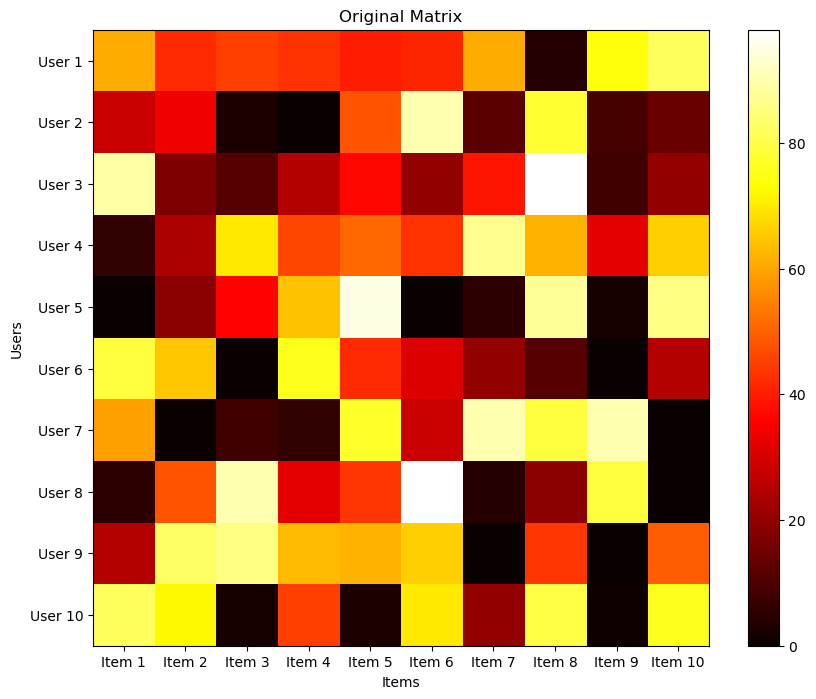

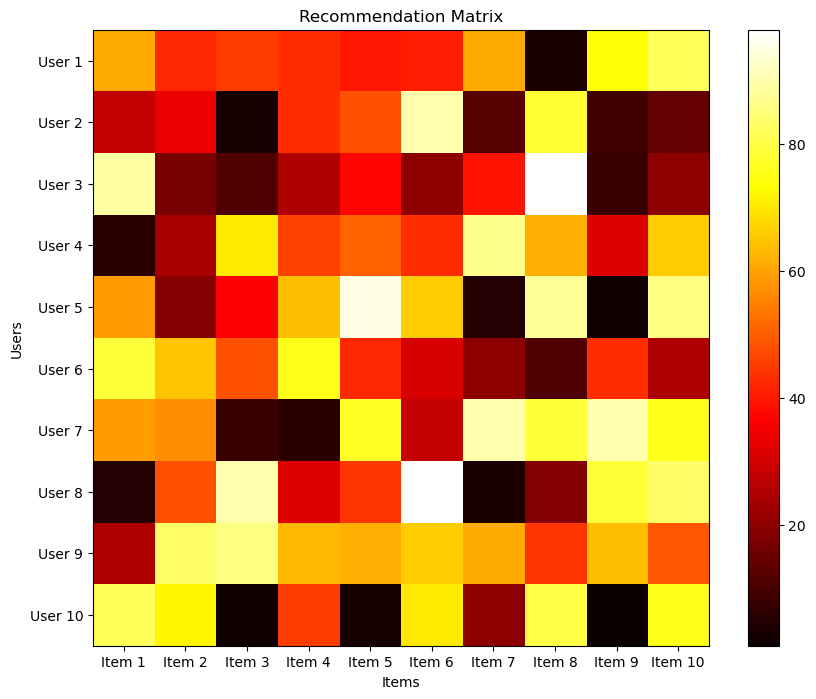

array([[61, 42, 45, 43, 40, 41, 61,  4, 74, 82],
       [28, 34,  3, 43, 48, 90, 12, 78,  9, 14],
       [89, 17, 11, 25, 37, 20, 39, 98,  8, 20],
       [ 6, 24, 70, 46, 51, 43, 87, 62, 32, 66],
       [59, 19, 36, 64, 95, 66,  5, 88,  2, 86],
       [79, 65, 48, 76, 42, 31, 20, 11, 43, 25],
       [59, 57,  8,  6, 77, 28, 90, 79, 90, 76],
       [ 5, 48, 90, 32, 44, 98,  4, 19, 79, 83],
       [25, 83, 86, 63, 62, 66, 61, 44, 64, 49],
       [82, 72,  2, 45,  3, 70, 20, 80,  1, 76]])

In [207]:
A = generate_evaluation_matrix(10,10,10)
print(A)
recommend_with_svd(A)